**Experiment 3 - Walking in a Direction**
 

I. Calculating Distance Covered 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Functions for Performing Double Integration of Accelerometer Data

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def load_data(gyro_fname, accel_fname, time_acc):
    gyro = np.loadtxt(gyro_fname, delimiter=',')
    accel = np.loadtxt(accel_fname, delimiter=',')
    #groundtruth = np.loadtxt(groundtruth_fname, delimiter=',')
    timestamp_acc = np.loadtxt(time_acc, delimiter=',')
    return gyro,accel, timestamp_acc

def double_integration(vect_x, vect_y, vect_z, calibration, velocity_init, position_init, delta_t):
    taille_vect = len(vect_x)
    velocity_x = []
    velocity_y = []
    velocity_z = []
    
    position_x = []
    position_y = []
    position_z = []
    val = []
    for i in range(0,taille_vect):
        if (i == 0):
            #Attention a le faire plus proprement pour initialisation different de
            # X(0, 0,0) V(0, 0, 0)
            velocity_x.append(velocity_init[0])
            velocity_y.append(velocity_init[1])
            velocity_z.append(velocity_init[2])
            

            position_x.append(position_init[0])
            position_y.append(position_init[1])
            position_z.append(position_init[2])
        if (i == 1):
            velocity_x.append(integration_trapeze_init(velocity_init[0], i, vect_x, delta_t[i]))
            velocity_y.append(integration_trapeze_init(velocity_init[1], i, vect_y, delta_t[i]))
            velocity_z.append(integration_trapeze_init(velocity_init[2], i, vect_z, delta_t[i]))
            

            position_x.append(position_init[0]+integration_trapeze_init(position_init[0], i, velocity_x, delta_t[i]))
            position_y.append(position_init[1]+integration_trapeze_init(position_init[1], i, velocity_y, delta_t[i]))
            position_z.append(position_init[2]+integration_trapeze_init(position_init[2], i, velocity_z, delta_t[i]))
        if (i > 1):
            #ipdb.set_trace()
            velocity_x.append(integration_trapeze(i-1, i, vect_x, delta_t[i]))
            # print(i,vect_x,velocity_x)
            velocity_y.append(integration_trapeze(i-1, i, vect_y, delta_t[i]))
            # print(i,vect_y,velocity_y)
            velocity_z.append(integration_trapeze(i-1, i, vect_z, delta_t[i]))
            

            position_x.append(position_x[i-1]+integration_trapeze(i-1, i, velocity_x, delta_t[i]))
            position_y.append(position_y[i-1]+integration_trapeze(i-1, i, velocity_y, delta_t[i]))
            position_z.append(position_z[i-1]+integration_trapeze(i-1, i, velocity_z, delta_t[i]))
            val.append(integration_trapeze(i-1, i, velocity_y, delta_t[i]))
    #ipdb.set_trace()
    #    print np.shape(position_x)
    #    print np.shape(position_y)
    velocity = np.array([velocity_x, velocity_y, velocity_z])
    position = np.array([position_x, position_y, position_z])
    return velocity, position, val

def integration_trapeze(a, b, f, delta_t):
    f_a = f[a]
    f_b = f[b]
    val_int = (f_a+f_b)/2.
    val_int *= delta_t
    # print('val_int=========================',f_a,f_b,val_int)
    

    return val_int

def integration_trapeze_init(val_init, b, f, delta_t):
    f_a = val_init
    f_b = f[b]
    val_int = (f_a+f_b)/2.
    val_int *= delta_t

    return val_int

Uploading Data and Computing delta_t

In [ ]:
# fpaths = ['/content/drive/MyDrive/dead_reckoning/new_walk_shoe/gyro.csv', '/content/drive/MyDrive/dead_reckoning/new_walk_shoe/accel.csv', '/content/drive/MyDrive/dead_reckoning/new_walk_shoe/accel_time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/walk_pocket/gyro.csv', '/content/drive/MyDrive/dead_reckoning/walk_pocket/accel.csv', '/content/drive/MyDrive/dead_reckoning/walk_pocket/time_acc.csv']
fpaths = ['/content/drive/MyDrive/dead_reckoning/walk/gyro.csv', '/content/drive/MyDrive/dead_reckoning/walk/accel.csv', '/content/drive/MyDrive/dead_reckoning/walk/accel_time.csv']

# fpaths = ['/content/drive/MyDrive/dead_reckoning/rotate/gyro_ro.csv', '/content/drive/MyDrive/dead_reckoning/rotate/accel_ro.csv', '/content/drive/MyDrive/dead_reckoning/rotate/accel_time_ro.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/circle/gyro.csv', '/content/drive/MyDrive/dead_reckoning/circle/accel.csv', '/content/drive/MyDrive/dead_reckoning/circle/time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/straight/gyro_.csv', '/content/drive/MyDrive/dead_reckoning/straight/accel.csv', '/content/drive/MyDrive/dead_reckoning/straight/time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/NINETY/gyro.csv', '/content/drive/MyDrive/dead_reckoning/NINETY/accel.csv', '/content/drive/MyDrive/dead_reckoning/NINETY/time.csv']



gyro,accel, timestamp_acc= load_data(*fpaths)
# print(timestamp_acc[0])
# print(val)
delta_t = [0.030210768]
for i in range(0,len(timestamp_acc)-1):
    dt = timestamp_acc[i+1] - timestamp_acc[i]
    delta_t.append(dt)
for i in range(0,len(accel)-2):
    # accel[i][1] += (accel[i-2][1]+accel[i-1][1]+accel[i+1][1])/3
    if accel[i][0] > -0.2 and accel[i][0] < 0.2:
        accel[i][0] = 0

Detecting Steps using Gyroscope and Accelerometer Data

1. Plotting Accelerometer Data

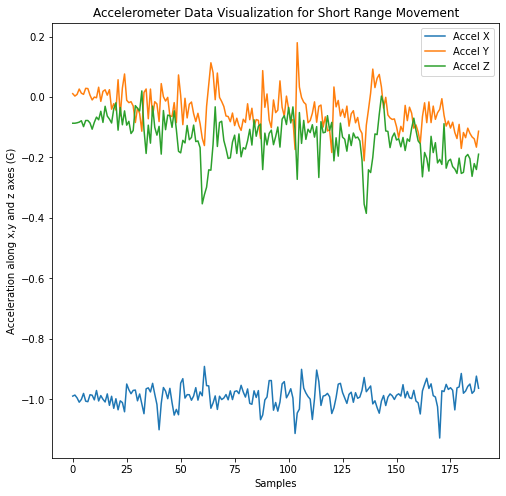

In [ ]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.title('Accelerometer Data Visualization for Short Range Movement')
plt.xlabel('Samples')
plt.ylabel('Acceleration along x,y and z axes (G)')
plt.plot(accel)
plt.legend(('Accel X', 'Accel Y', 'Accel Z'))
plt.show()

2. Plotting Gyroscope Data

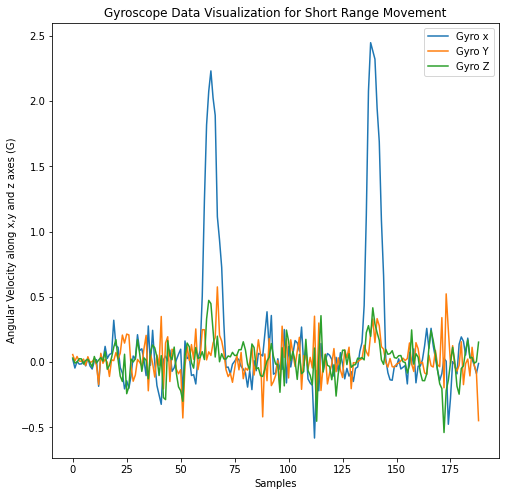

In [ ]:
plt.title('Gyroscope Data Visualization for Short Range Movement')
plt.xlabel('Samples')
plt.ylabel('Angular Velocity along x,y and z axes (G)')
plt.plot(gyro)
plt.legend(('Gyro x', 'Gyro Y', 'Gyro Z'))
plt.show()

Determining the Number of Steps

In [ ]:
vel = 0.97
val_calib = 0.5
velocity_init = [0,0,0]
position_init = [0,0,0]
steps = []
step_n = []
prev = -1
# print(gyro[:,0])
for i in range(len(gyro[:,0])):
    if gyro[i,0] > 0.2 and prev not in range(i-5,i): #and gyro[i,1] < -1.2: #or gyro[i,2] < -1.7:
        prev = i
        steps.append(gyro[i,0])
        step_n.append(i)

# print(len(steps))
print(step_n)
print('Total Number of Steps taken:',len(step_n))

dist_x = []
a =0
for i in step_n:
    # print(i)
    for j in range(0,i):
        if a not in dist_x:
            dxdt = vel + accel[j,0]*dt
            x = (dt*dxdt).cumsum()
            a = x
            dist_x.append(a)

[19, 30, 37, 60, 66, 89, 98, 106, 135, 141, 164]
Total Number of Steps taken: 11


Calculating Step-Wise Velocity and Distance by Calling Double Integration Function on each Step 



In [ ]:
velocity_step = []
position_step = []
for i in range(0,len(step_n)):
  if i == 1:
    velocity, position, val = double_integration(accel[0:step_n[i],0]*9.8+9.8,accel[0:step_n[i],1]*9.8,accel[:step_n[i],2]*9.8, val_calib, velocity_init, position_init, delta_t)
    velocity_step.append(velocity)
    position_step.append(position)
  if i > 1:
    velocity, position, val = double_integration(accel[step_n[i-1]:step_n[i],0]*9.8+9.8,accel[step_n[i-1]:step_n[i],1]*9.8,accel[step_n[i-1]:step_n[i],2]*9.8, val_calib, velocity_init, position_init, delta_t)
    velocity_step.append(velocity)
    position_step.append(position)

# print(velocity_step)

Calculating Distance Travelled along Each Axis: X,Y and Z and Euclidean Distance in (Y-Z) plane

10
dx_step [-0.008166466119692246, -0.0078214235047314, -0.007016324857723574, -0.006684487232313494, -0.007070556637506271, -0.006863869221451787, -0.006078836218958009, -0.006117519043924057, -0.006306382090273616, -0.005433521127659481, -0.004449076048247824, -0.003496417603443002, -0.002246432627331531, -0.0015072879926437271, -0.0010457492534130149, -0.0009687629511743413, -0.0009767477971013632, -0.0008197627065196379, -0.0011337759125013966, -0.001888090253626659, -0.0030899113723302837, -0.004617122995588366, -0.00644090265341813, -0.007840130643342463, -0.009542512725437387, -0.010621838347770293, -0.0083623084838588, -0.005087165810095575, -0.0026672161214113576, 8.673617379884035e-19, -0.0023932734866043115, -0.0019595056185667116, -0.0014517422887940054, -0.0029258598770740686, -0.004802733545237022, -0.0033346838298677637, 1.3010426069826053e-18, -0.004475105980910053, -0.004063329845878106, -0.0036632693454846867, -0.006609987529011801, -0.012400649060399282, -0.014635148

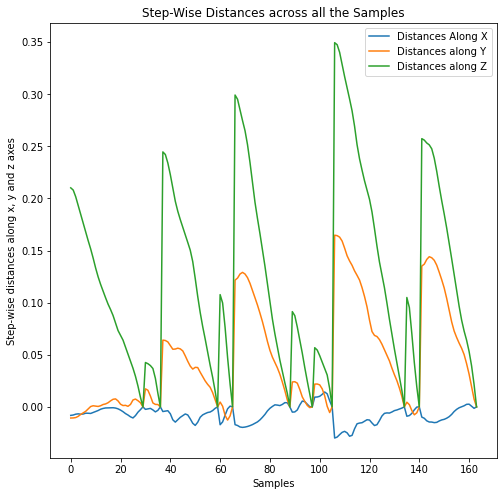

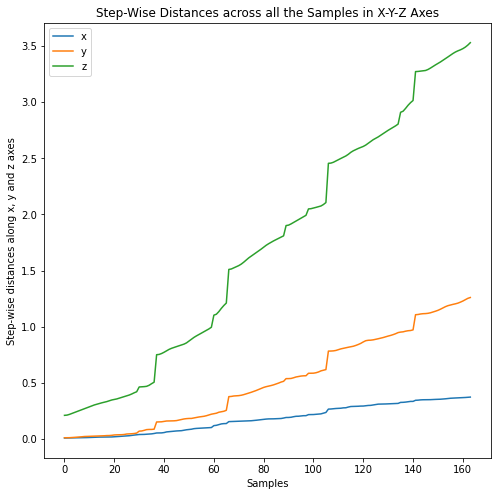

3.528868348015809
3.8181402053492914


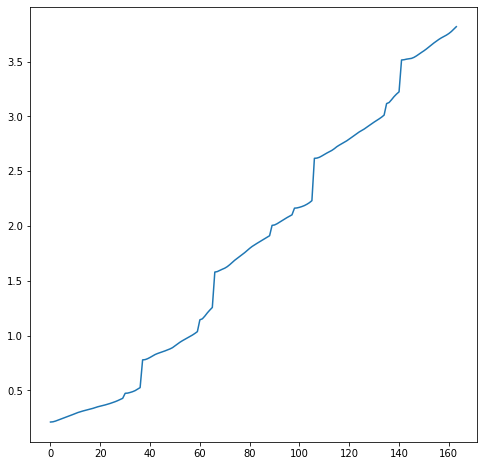

In [ ]:
positions_x = []
positions_y = []
positions_z = []
for p in range(0,len(position_step)):
  positions_x.append(position_step[p][0])
  positions_y.append(position_step[p][1])
  positions_z.append(position_step[p][2])
print(len(positions_x))
dx_step = []
tot = 0
tot_dx = 0
toty = 0
dxt = []
tot_x = []

for x in range(0,len(positions_x)):
  # print(type(positions_x[x]))
  for i in range(0,len(positions_x[x])):
    dx = abs(positions_x[x][i] - positions_x[x][i-1])
    tot_dx += dx
    tot_x.append(tot_dx)

    dx2 = (positions_x[x][i] - positions_x[x][i-1])
    dxt.append(dx)
    tot += dx2
    dx_step.append(tot)

print('dx_step',dx_step)


dy_step = []
dyt = []
tot_y = []
tot_dy = 0

for y in range(0,len(positions_y)):
  # print(type(positions_y[y]))
  for j in range(0,len(positions_y[y])):
    dy = abs(positions_y[y][j] - positions_y[y][j-1])
    tot_dy += dy
    tot_y.append(tot_dy)
    dy2 = positions_y[y][j] - positions_y[y][j-1]
    dyt.append(dy)
    toty += dy2
    dy_step.append(toty)
totz = 0
dz_step = []
dzt = []
print('dz_step',dz_step)
tot_z = []
tot_dz = 0
for z in range(0,len(positions_z)):
  for k in range(0,len(positions_z[z])):
    dz = abs(positions_z[z][k] - positions_z[z][k-1])
    dz2 = positions_z[z][k] - positions_z[z][k-1]
    tot_dz += dz
    tot_z.append(tot_dz)
    dzt.append(dz2)
    totz += dz2
    dz_step.append(totz)


tote = 0
dz_step_eu = []
print('total distance------> along x: ', tot_dx, 'along y: ',tot_dy, 'along z: ',tot_dz)
# print(tot/len())
for z in range(0,len(positions_z)):
  for k in range(0,len(positions_z[z])):
    de = np.sqrt(np.square((positions_z[z][k] - positions_z[z][k-1]))+np.square((positions_y[z][k] - positions_y[z][k-1])))
    dzt.append(de)
    tote += de
    dz_step_eu.append(tote)

print("euclidean distance y-z: ", dz_step_eu)
plt.title('Step-Wise Distances across all the Samples')
plt.xlabel("Samples")
plt.ylabel("Step-wise distances along x, y and z axes")
plt.plot(dx_step)
plt.plot(dy_step)
plt.plot(dz_step)
plt.legend(('Distances Along X','Distances along Y','Distances along Z'))
plt.show()

plt.title('Step-Wise Distances across all the Samples in X-Y-Z Axes')
plt.xlabel("Samples")
plt.ylabel("Step-wise distances along x, y and z axes")
plt.plot(tot_x)
plt.plot(tot_y)
plt.plot(tot_z)
plt.legend(('x','y','z'))
plt.show()

print(tot_dz)
print(tote)





plt.plot(dz_step_eu)
plt.show()

**II. Plotting Distance with Direction**

Getting Data

In [ ]:
# yaw = np.loadtxt('/content/drive/MyDrive/dead_reckoning/straight/yaw_s.csv', delimiter=',')
# yaw = np.loadtxt('/content/drive/MyDrive/dead_reckoning/circle/yaw.csv', delimiter=',')
yaw = np.loadtxt('/content/drive/MyDrive/dead_reckoning/walk/yaw.csv', delimiter=',')
# yaw = np.loadtxt('/content/drive/MyDrive/dead_reckoning/rotate/yaw_ro.csv', delimiter=',')
# yaw = np.loadtxt('/content/drive/MyDrive/dead_reckoning/NINETY/yaw_90.csv', delimiter=',')

motion_r = np.loadtxt('/content/drive/MyDrive/dead_reckoning/walk/motion_r.csv', delimiter=',')

Function for plotting Distance with Direction

In [ ]:
def plot_point(start_point, yaw, length):
     x, y = start_point
     xs = []
     ys = []
     xys =[]
     xye = []

     for i in range(0,len(length)):
       if (i==0):
        startx = x
        starty = y
        endy = y + length[i] * math.sin(yaw[0])
        endx = length[i] * math.cos(yaw[0])
        xs.append([startx,endx])
        ys.append([starty,endy])
       if (i > 0):
        startx = endx
        starty = endy
        endy = y + length[i] * math.sin(yaw[i])
        endx = x + length[i] * math.cos(yaw[i])
        xs.append([startx,endx])
        ys.append([starty,endy])
        xys.append([startx,starty])
        xye.append([endx,endy])

     fig = plt.figure()
     ax = plt.subplot(111)
     ax.plot(xs,ys)
    #  plt.title('Plotting change in angles with Distance')
     plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory'))
    #  ax.set_ylim([0, 20])   # set the bounds to be 10, 10
    #  ax.set_xlim([-10, 11])
     plt.xlabel("Y coordinates (meters)")
     plt.ylabel("Z coordinates (meters)")
     
     plt.rcParams["figure.figsize"] = [5, 5]
     plt.rcParams["figure.autolayout"] = True
     im = plt.imread("/content/drive/MyDrive/dead_reckoning/walk/IMG_4357.png")
     fig, ax = plt.subplots()
     plt.xlabel("South-West")
     plt.ylabel("South-East")
     ax.plot(xs,ys)
    # plot_point((dy_step[0],dz_step[0]), poly_y3, dz_step_eu)
     im = ax.imshow(im, extent=[-5.0, 2.0, -1, 5.0])
     x = np.array(range(300))










Integrating Gyro data and getting change in Angles across all samples

In [ ]:
dx_plot = dx_step
dy_plot = dy_step
angle =0.0

angles = []
yaw_angles = []
yaw_angle = 0.0
for i in range(0,len(gyro[:,0])):
  angle += gyro[i,0]*delta_t[i]
  angles.append(angle)
motion_ro = []
r = 0.0
for i in range(0,len(motion_r)):
  r += (motion_r[i]+motion_r[i-1])/2*delta_t[i]
  motion_ro.append(r)

# for i in range(0,len(yaw)):
#   yaw_angle = yaw[i] - yaw[i-1]
#   yaw_angles.append(yaw_angle)

print(angles)
yaw_plot = []
for i in range(0, len(step_n)):
  yaw_plot.append(motion_ro[step_n[i]])


[0.0006800957459855999, -0.00395473505800911, -0.0035223156949909713, -0.005160015743906482, -0.006597479598257652, -0.006125281173401524, -0.009060668680825173, -0.005735028137633063, -0.00873535486505812, -0.014129398981433772, -0.013557900507142666, -0.011707330148302539, -0.030421584971588325, -0.02503467679363152, -0.024090816479359237, -0.012019581285177492, -0.009253777620420487, -0.0034434627064544995, 0.0032224365785700404, 0.035483453140379054, 0.04825501937241598, 0.059545427198260795, 0.05533260420447378, 0.04683714870727512, 0.02612348021418598, 0.011611238510271306, -0.008670465773448469, -0.019414803197545277, -0.01478192633552482, -0.0123643906073924, 0.008725821435476008, 0.017566397765907703, 0.027791300998830773, 0.029211651517981573, 0.01870397638071373, 0.04654713273394609, 0.044030385906286114, 0.06851976306833713, 0.06805676511328708, 0.04990810818385356, 0.024341853733386088, -0.008284630487481365, -0.0065708593420042045, -0.0019460059784193766, -0.0010484159284

Plotting
1. Yaw Axis Rotation Angles
2. Change in angle along x-axis by integrating Gyro X data
3. User motion_rotate rate of change in angle along X axis

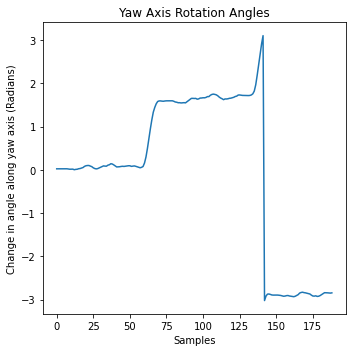

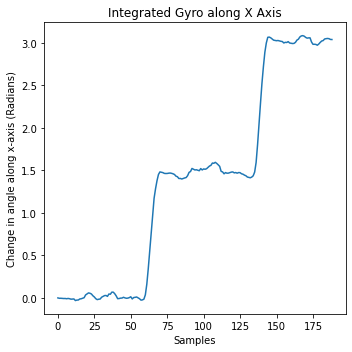

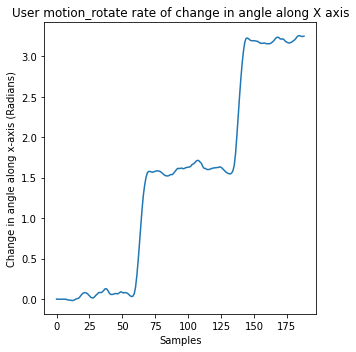

In [ ]:
plt.title('Yaw Axis Rotation Angles')
plt.xlabel('Samples')
plt.ylabel('Change in angle along yaw axis (Radians)')
plt.plot(yaw)
plt.show()
plt.title('Integrated Gyro along X Axis')
plt.xlabel('Samples')
plt.ylabel('Change in angle along x-axis (Radians)')
plt.plot(angles)
plt.show()
plt.title('User motion_rotate rate of change in angle along X axis')
plt.xlabel('Samples')
plt.ylabel('Change in angle along x-axis (Radians)')
plt.plot(motion_ro)
plt.show()



Plotting Sample-Wise Direction along Distance: Movement Trajectory with Total Euclidean distance in (Y-Z) plane as the length of trajectory, along:
1. User motion_rotate rate of change in angle along X axis 
2. Change in angle along x-axis by integrating Gyro X data
3. Yaw Axis Rotation Angles

164
189


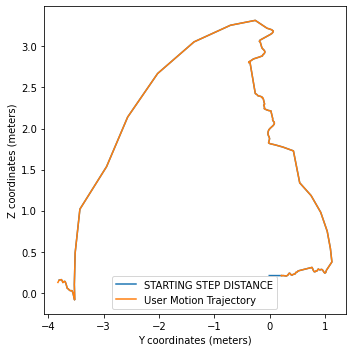

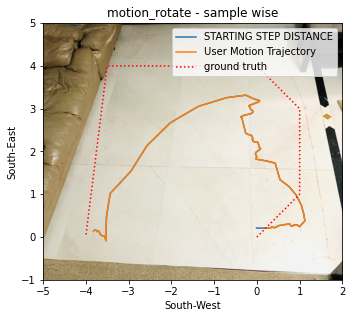

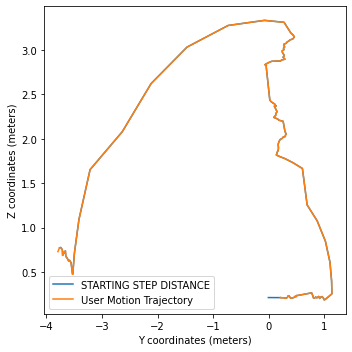

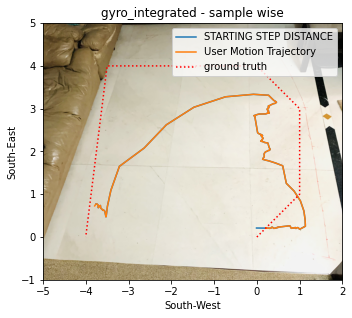

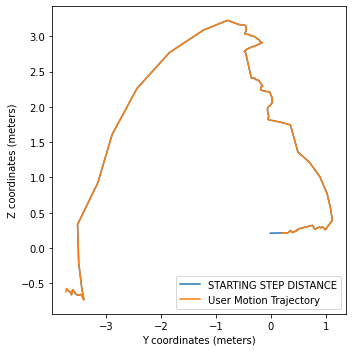

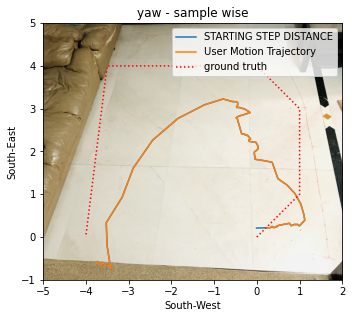

In [ ]:
listx = [0,1,1,0,-3.5,-4]
listy = [0,1,3,4,4,0]
plot_point((dx_step[0],dz_step[0]), motion_ro, dz_step_eu)
plt.title('motion_rotate - sample wise')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))


plot_point((dx_step[0],dz_step[0]), angles, dz_step_eu)
plt.title('gyro_integrated - sample wise')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))


plot_point((dx_step[0],dz_step[0]), yaw, dz_step_eu)
plt.title('yaw - sample wise')

plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))
print(len(dx_plot))
print(len(yaw))


# fig = plt.figure()
# plt.plot(dy_plot)
# fig = plt.figure()
# plt.plot(dx_plot,dy_plot)

Plotting Step-Wise Direction along Distance: Movement Trajectory with Total Euclidean distance in (Y-Z) plane as the length of trajectory, along:

1. Yaw Axis Rotation Angles
2. Change in angle along x-axis by integrating Gyro X data
3. User motion_rotate rate of change in angle along X axis

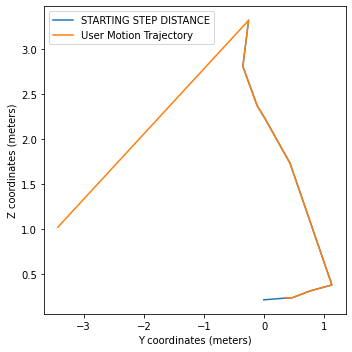

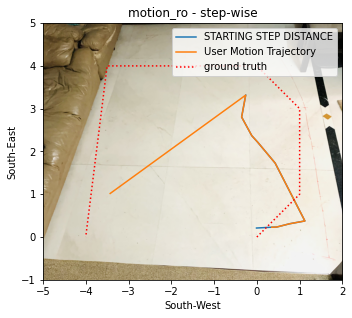

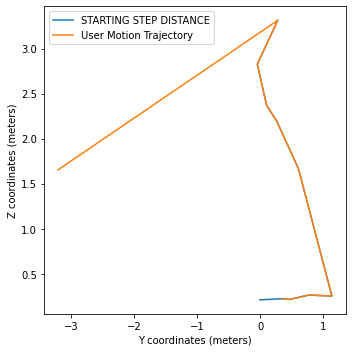

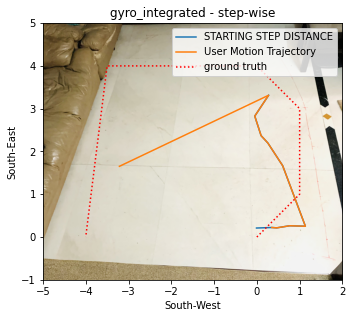

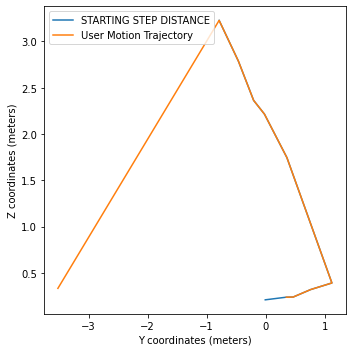

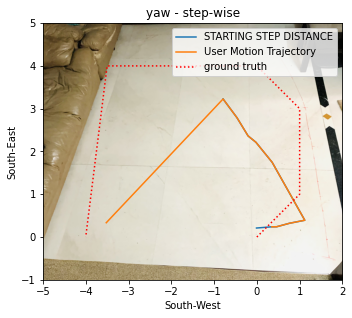

In [ ]:
listx = [0,1,1,0,-3.5,-4]
listy = [0,1,3,4,4,0]
steps = []
index_x = []
# print(step_n)
for i in range(0,len(step_n)):
  # print(step_n[i])
  for j in range(0,len(dz_step_eu)):
    if step_n[i] == j:
      steps.append(dz_step_eu[int(j)])
      index_x.append(int(j))


# print(samples_x)
# print(index_x)
yaw_plots = []
gyro_plots = []
yaw_p = []
motionro_plots = []
for i in range(0, len(steps)):
  motionro_plots.append(motion_ro[index_x[i]])
for i in range(0, len(steps)):
  gyro_plots.append(angles[index_x[i]])
for i in range(0, len(steps)):
  yaw_plots.append(yaw[index_x[i]])


  # yaw_p.append((yaw[index_x[i]]+yaw[index_x[i-1]]+yaw[index_x[i-2]])/3)


plot_point((dx_step[0],dz_step[0]), motionro_plots, steps)
plt.title('motion_ro - step-wise')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))

plot_point((dx_step[0],dz_step[0]), gyro_plots, steps)
plt.title('gyro_integrated - step-wise')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))

plot_point((dx_step[0],dz_step[0]), yaw_plots, steps)
plt.title('yaw - step-wise')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))
# print(yaw_plots)
# print(np.array(yaw_plots) * (180/np.pi))
# print(np.array(gyro_plots) * (180/np.pi))
# print(samples_x)
# print(dz_step[0],dy_step[0])





      


Smoothening the yaw, gyro and motion_rotate curves using PolyFit

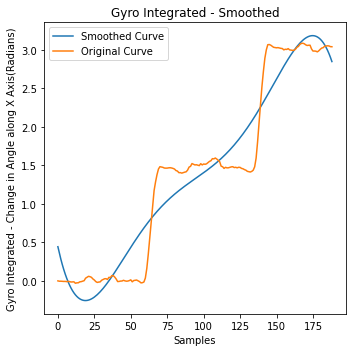

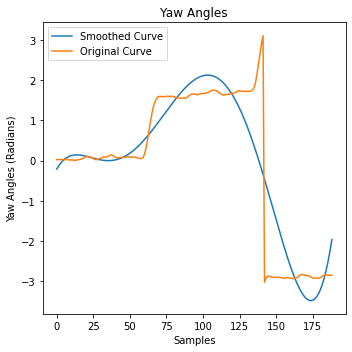

<Figure size 360x360 with 0 Axes>

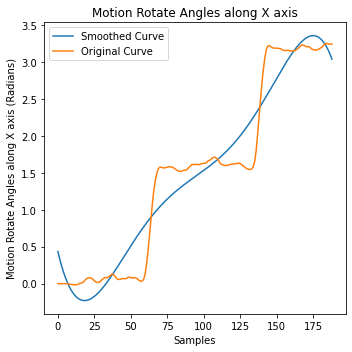

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# print(len(yaw))
points = []

for i in range(0,len(angles)):
  points.append(i)

plt.figure()
plt.title('Gyro Integrated - Smoothed')
plt.xlabel('Samples')
plt.ylabel('Gyro Integrated - Change in Angle along X Axis(Radians)')
poly1 = np.polyfit(points,angles,5)
poly_y1 = np.poly1d(poly1)(points)
plt.plot(points,poly_y1)
plt.plot(points,angles)
plt.legend(('Smoothed Curve','Original Curve'))
plt.show()
pointsy =[]
for i in range(0,len(motion_ro)):
  pointsy.append(i)
plt.figure()
plt.title('Yaw Angles')
plt.xlabel('Samples')
plt.ylabel('Yaw Angles (Radians)')
poly2 = np.polyfit(pointsy,yaw,5)
poly_y2 = np.poly1d(poly2)(pointsy)
plt.plot(pointsy,poly_y2)
plt.plot(pointsy,yaw)
plt.legend(('Smoothed Curve','Original Curve'))
plt.show()

pointsr = []

for i in range(0,len(motion_ro)):
  pointsr.append(i)

plt.figure()
plt.figure()
plt.title('Motion Rotate Angles along X axis')
plt.xlabel('Samples')
plt.ylabel('Motion Rotate Angles along X axis (Radians)')
poly3 = np.polyfit(pointsr,motion_ro,5)
poly_y3 = np.poly1d(poly3)(pointsr)
plt.plot(pointsr,poly_y3)
plt.plot(pointsr,motion_ro)

plt.legend(('Smoothed Curve','Original Curve'))
plt.show()

# print(len(poly_y))

Plotting Smoothed Sample-Wise Direction along Distance: Movement Trajectory with Total Euclidean distance in (Y-Z) plane as the length of trajectory, along:

1. Yaw Axis Rotation Angles
2. Change in angle along x-axis by integrating Gyro X data
3. User motion_rotate rate of change in angle along X axis

164


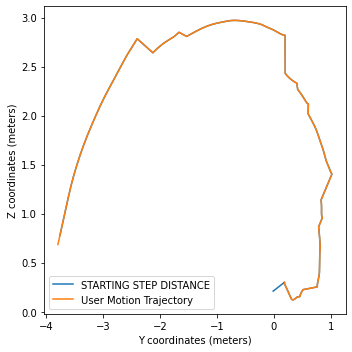

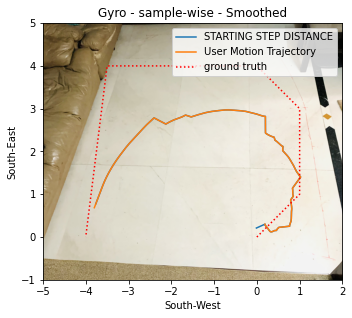

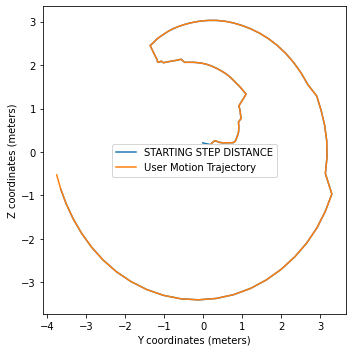

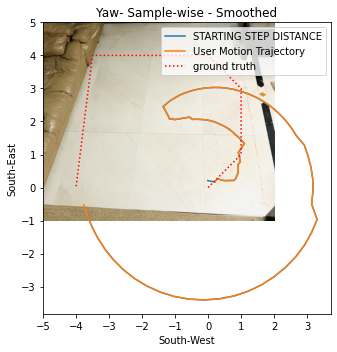

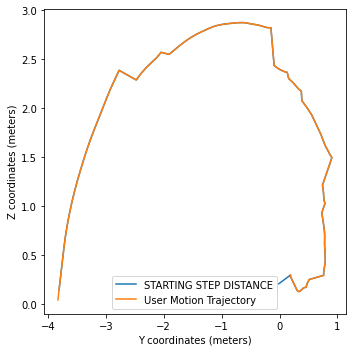

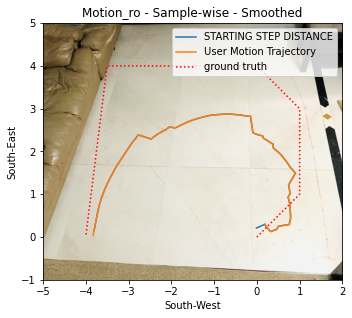

In [ ]:
listx = [0,1,1,0,-3.5,-4]
listy = [0,1,3,4,4,0]

plot_point((dy_step[0],dz_step[0]), poly_y1, dz_step_eu)
plt.title('Gyro - sample-wise - Smoothed')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))
plot_point((dy_step[0],dz_step[0]), poly_y2, dz_step_eu)
plt.title('Yaw- Sample-wise - Smoothed')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))
plot_point((dy_step[0],dz_step[0]), poly_y3, dz_step_eu)
plt.title('Motion_ro - Sample-wise - Smoothed')
plt.plot(listx,listy,ls = 'dotted', color = 'red')
plt.legend(('STARTING STEP DISTANCE','User Motion Trajectory','ground truth'))
# print(len(poly_y))
print(len(dz_step_eu))

**Experiment 2 - Walking in an Empty Space and getting the Trajectory**

In [ ]:
# fpaths = ['/content/drive/MyDrive/dead_reckoning/new_walk_shoe/gyro.csv', '/content/drive/MyDrive/dead_reckoning/new_walk_shoe/accel.csv', '/content/drive/MyDrive/dead_reckoning/new_walk_shoe/accel_time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/walk_pocket/gyro.csv', '/content/drive/MyDrive/dead_reckoning/walk_pocket/accel.csv', '/content/drive/MyDrive/dead_reckoning/walk_pocket/time_acc.csv']
fpaths = ['/content/drive/MyDrive/dead_reckoning/new_walk2/gyro.csv', '/content/drive/MyDrive/dead_reckoning/new_walk2/accel.csv', '/content/drive/MyDrive/dead_reckoning/new_walk2/accel_time.csv']

# fpaths = ['/content/drive/MyDrive/dead_reckoning/rotate/gyro_ro.csv', '/content/drive/MyDrive/dead_reckoning/rotate/accel_ro.csv', '/content/drive/MyDrive/dead_reckoning/rotate/accel_time_ro.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/circle/gyro.csv', '/content/drive/MyDrive/dead_reckoning/circle/accel.csv', '/content/drive/MyDrive/dead_reckoning/circle/time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/straight/gyro_.csv', '/content/drive/MyDrive/dead_reckoning/straight/accel.csv', '/content/drive/MyDrive/dead_reckoning/straight/time.csv']
# fpaths = ['/content/drive/MyDrive/dead_reckoning/NINETY/gyro.csv', '/content/drive/MyDrive/dead_reckoning/NINETY/accel.csv', '/content/drive/MyDrive/dead_reckoning/NINETY/time.csv']



gyro,accel, timestamp_acc= load_data(*fpaths)
# print(timestamp_acc[0])
# print(val)
delta_t = [0.030210768]
for i in range(0,len(timestamp_acc)-1):
    dt = timestamp_acc[i+1] - timestamp_acc[i]
    delta_t.append(dt)
for i in range(0,len(accel)-2):
    # accel[i][1] += (accel[i-2][1]+accel[i-1][1]+accel[i+1][1])/3
    if accel[i][0] > -0.2 and accel[i][0] < 0.2:
        accel[i][0] = 0

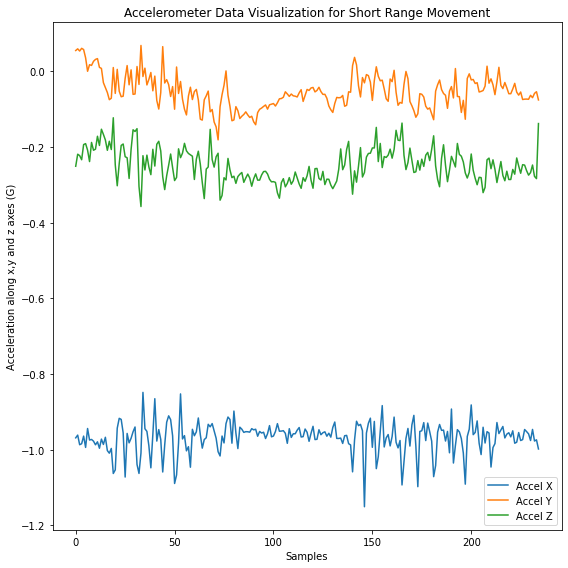

In [ ]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.title('Accelerometer Data Visualization for Short Range Movement')
plt.xlabel('Samples')
plt.ylabel('Acceleration along x,y and z axes (G)')
plt.plot(accel)
plt.legend(('Accel X', 'Accel Y', 'Accel Z'))
plt.show()

**Drift Reduction**

Discrete Fourier Transform

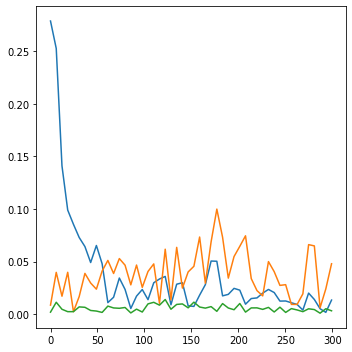

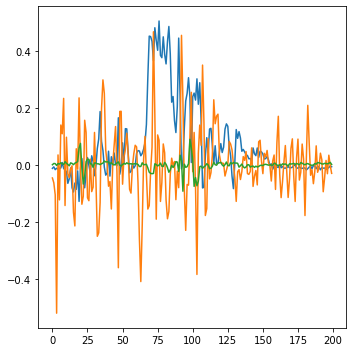

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack

# Number of sample points

motion_r = np.loadtxt('/content/drive/MyDrive/dead_reckoning/table/gyro.csv', delimiter=',')



N = 100
# sample spacing
T = 1.0 / 600
x = np.linspace(0.0, N*T, N)
yf = scipy.fftpack.fft(motion_r[:,0])
yf2 = scipy.fftpack.fft(motion_r[:,1])      #y
yf3 = scipy.fftpack.fft(motion_r[:,2])  
# yf4 = scipy.fftpack.ifft(motion_r[:,2])    #z
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)

fig, ax = plt.subplots()

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# ax.plot(yf2)

plt.plot(xf, 2.0/N * np.abs(yf2[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf3[:N//2]))

plt.show()
plt.plot(motion_r)
# plt.plot(xf, 2.0/N * np.abs(yf4[:N//2]))
# plt.show()
# plt.plot(motion_r[:,2])
plt.show()